# Homework 3
## Juan Francisco Cisneros

In [157]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        result = func(*args, **kwargs)
        return t2-t1,result
    return wrap_func

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [158]:
import ctypes
import math
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None): #CONSTANT
        self.val = val
        self.next_node = None

    def set_next_node(self, next_node): #CONSTANT
        self.next_node = next_node


In [159]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None): #CONSTANT
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            try:
                print(node.val)
                node = node.next_node
            except:
                print()

    def insert_head(self, new_node): #CONSTANT
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete(self,value): #O(n)
        node = self.head_node
        prev = None

        if node.val == value:
            self.head_node = self.head_node.next_node
            node.set_next_node(None)
            return node.val


        while node and node.val != value:
            prev = node
            if node.next_node != None:
                node = node.next_node
        if node:
            prev.set_next_node(node.next_node)
            node.set_next_node(None)
        else:
            raise ValueError('No value founded')

In [160]:
def mergeLists(list1,list2):
    def mergeRecursive( node1, node2):
        if (node1 == None):
            return node2
        if (node2 == None):
            return node1
        if (node1.val < node2.val):
            node1.next_node = mergeRecursive(node1.next_node, node2)
            return node1
        else:
            node2.next_node = mergeRecursive(node1, node2.next_node)
            return node2
    return Singly_linked_list(mergeRecursive(list1.head_node,list2.head_node))

In [161]:
l1 = Singly_linked_list(Node(0))
l1.insert_tail(Node(2))
l1.insert_tail(Node(4))
l1.insert_tail(Node(6))
l1.insert_tail(Node(10))
l1.list_traversed()

0
2
4
6
10


In [162]:
l2 = Singly_linked_list(Node(1))
l2.insert_tail(Node(3))
l2.insert_tail(Node(5))
l2.insert_tail(Node(7))
l2.insert_tail(Node(8))
l2.insert_tail(Node(9))
l2.insert_tail(Node(11))
l2.list_traversed()

1
3
5
7
8
9
11


In [163]:
l = mergeLists(l1,l2)

In [164]:
l.list_traversed()

0
1
2
3
4
5
6
7
8
9
10
11


### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [165]:
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [166]:
array = [1, 4, 2, 6, 3, 7, 5, 8]
print(sorting(array))

[1, 2, 3, 4, 5, 6, 7, 8]


### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [167]:
import random
import numpy as np

In [168]:
arrays = []
for i in range(0,1000):
    array = np.random.permutation(10000)
    arrays.append(array)
    print(arrays[i])

[1353 3788 8192 ... 6519 9805 2961]
[3194 3243  495 ... 5431 6838  532]
[5821 6642 7428 ... 1344  862 2619]
[1898 5580 2569 ...  532 2105 5668]
[ 784 8860 1370 ... 4176 4780 4412]
[7737 9751 6748 ... 4368 2367  976]
[8160  996 1047 ... 9631 6760 3775]
[8311 8085 1498 ... 6074 8284 5842]
[7708 7812   62 ... 3758 1243 8649]
[3073 9548 5459 ... 3158 6507 9476]
[2979 6041 2837 ... 8894 6487 6643]
[8304 7147 3998 ... 1247  846 6476]
[ 681 9527 4751 ... 1306 6253 4867]
[1203 6214 4918 ...  722 9586 2422]
[8951  551 1873 ... 8889 2736 1790]
[7088 4746  658 ... 4875 8282 3437]
[7389 5553 9099 ... 4433 2473 7489]
[5364 3792 5023 ... 5918  308  200]
[5433 1440 4970 ... 7483 8804 1880]
[9543 4289 5106 ... 2779 7521 9953]
[ 258  296 8112 ... 9880 9519 4485]
[8146 7570 9385 ...  677 7650 9250]
[7673 7883 9305 ... 5437 8903 2260]
[2060 3649 9788 ... 9505 4959 2776]
[2460   87 4960 ... 7068 6569 3932]
[8825 1110 8981 ... 1458 6532 7702]
[7449 9824 1543 ... 4711 2216 7395]
[9946 3526 2688 ... 2824 975

In [169]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        return t2-t1
    return wrap_func

### LETS USE THE MERGE SORT ALGORITHM FROM THE PREVIOUS CLASS

In [170]:
@timer_func
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1

    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])

    return sorted_list

In [171]:
merge_sortTime = []
for i in range(0,1000):
    merge_sortTime.append(merge_sort(arrays[i]))
    print(merge_sortTime[i])

2359296.0
2097152.0
1310720.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
1048576.0
1048576.0
786432.0
786432.0
0.0
0.0
1048576.0
786432.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
1048576.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
786432.0
1310720.0
0.0
0.0
1048576.0
786432.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
1310720.0
1048576.0
1310720.0
0.0
1048576.0
786432.0
0.0
786432.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
786432.0
1048576.0
1835008.0
0.0
0.0
0.0
1048576.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
1048576.0
2097152.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
1048576.0
0.0
0.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
1310720.0
0.0
0.0
0.0
0.0
786432.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

### LETS USE THE QUICK SORT ALGORITHM FROM THE PREVIOUS EXERCISE

In [172]:
@timer_func
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [173]:
quick_sortTime = []
for i in range(0,1000):
    quick_sortTime.append(sorting(arrays[i]))
    print(quick_sortTime[i])

524288.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
1048576.0
0.0
0.0
1835008.0
0.0
0.0
0.0
0.0
0.0
1310720.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
1048576.0
0.0
786432.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
524288.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
786432.0
0.0

In [174]:
import pandas as pd
df = pd.DataFrame(zip(merge_sortTime,quick_sortTime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Merge Sort','T(n) Quick Sort',]
df

,T(n) Merge Sort,T(n) Quick Sort
0,2359296.0,524288.0
1,2097152.0,1048576.0
2,1310720.0,0.0
3,0.0,0.0
4,1048576.0,0.0
...,...,...
995,0.0,1048576.0
996,0.0,0.0
997,0.0,1048576.0
998,0.0,1310720.0


<AxesSubplot: >

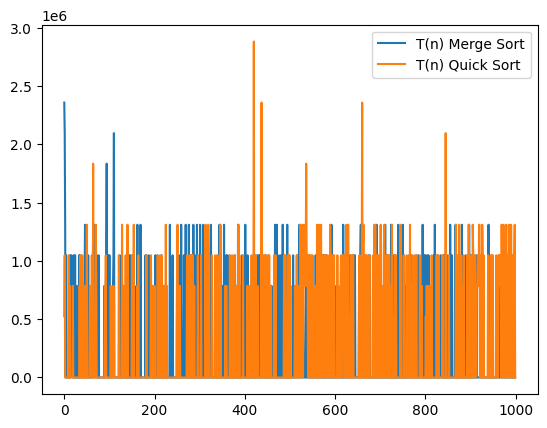

In [175]:
df.plot()

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [176]:
def factorialNumber(k):

    if k == 0:
        return 1

    return k * factorialNumber(k-1)

In [177]:
factorialNumber(10000)

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
@timer_func
def factorialNumber(k):

    if k == 0:
        return 1

    return k * factorialNumber(k-1)

In [ ]:
factorialCalculationTime = []
for i in range(0,1000):
    factorialCalculationTime.append(factorialNumber(i))


In [178]:
factorialCalculationTime

[2097152.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1310720

In [179]:
df = pd.DataFrame(zip(factorialCalculationTime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Factorial Runtime']
df

,T(n) Factorial Runtime
0,2097152.0
1,0.0
2,0.0
3,0.0
4,1048576.0
...,...
995,0.0
996,0.0
997,0.0
998,1048576.0


<AxesSubplot: >

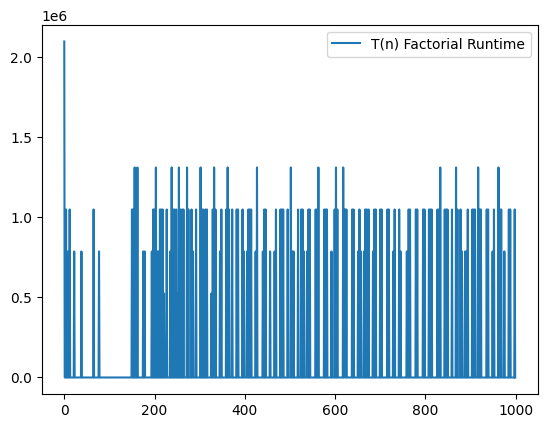

In [180]:
df.plot()

The complexity for the factorial fucntion without memoization is O(n) because the function is called n times.

In [193]:
def factorialNumberWithMemoization(n, memory = []):
    if n in memory:
        return memory[n]
    if n == 0:
        return 1
    memory[n] = n * factorialNumberWithMemoization(n-1, memory)
    return memory[n]

In [194]:
factorialNumberWithMemoization(10000)

RecursionError: maximum recursion depth exceeded in comparison

In [195]:
@timer_func
def factorialNumberWithMemoization(n, memory = []):
    if n in memory:
        return memory[n]
    if n == 0:
        return 1
    memory[n] = n * factorialNumberWithMemoization(n-1, memory)
    return memory[n]

In [196]:
factorialCalculationTimeWithMemoization = []
for i in range(0,1000):
    factorialCalculationTimeWithMemoization.append(factorialNumberWithMemoization(i))


In [197]:
factorialCalculationTimeWithMemoization

[786432.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 524288.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.

In [198]:
df = pd.DataFrame(zip(factorialCalculationTimeWithMemoization))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Factorial Runtime With Memoization']
df

,T(n) Factorial Runtime With Memoization
0,786432.0
1,0.0
2,786432.0
3,0.0
4,0.0
...,...
995,0.0
996,1048576.0
997,0.0
998,0.0


<AxesSubplot: >

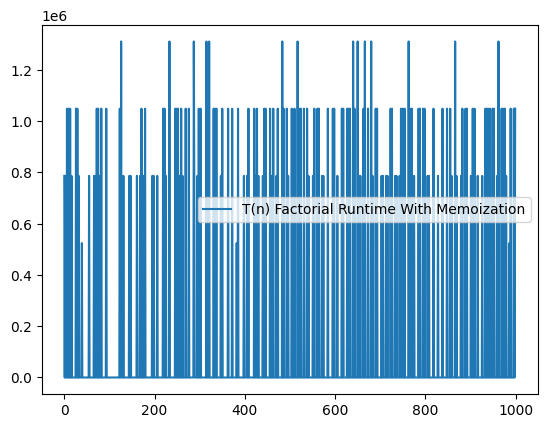

In [199]:
df.plot()

The complexity for the factorial function with memoization is O(n) because the function in the worst case is called n times. But
